## Let's start by importing the dataset and visualizing the missing variables to verify the integrity of the dataset

In [86]:
import pandas as pd
df_songs = pd.read_csv("songs_details.csv")

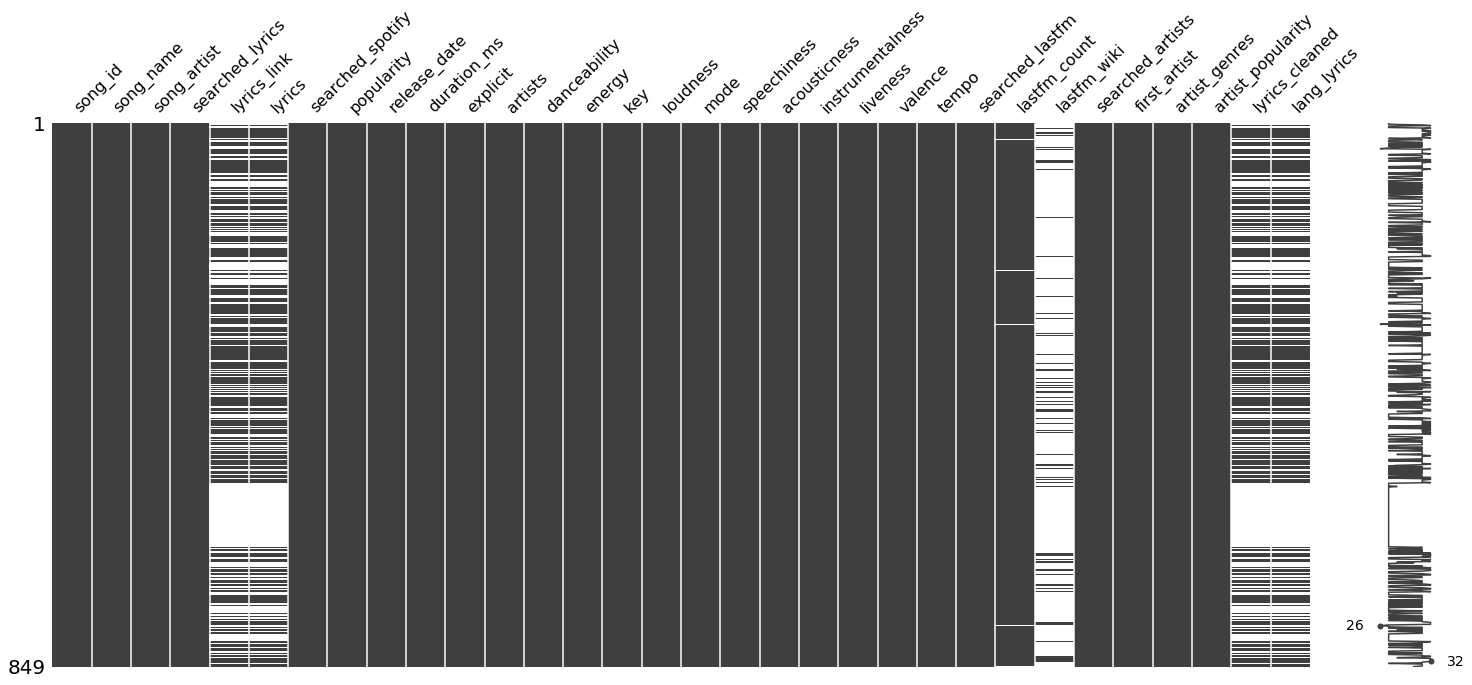

In [87]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
msno.matrix(df_songs)

## How "hip" are my musical tastes? Does that depend on the language of the lyrics?

In [88]:
print(df_songs["popularity"].mean())
print(df_songs["artist_popularity"].mean())

42.800942285041224
70.24852767962308


In [89]:
df_songs.fillna("No Lyrics").groupby("lang_lyrics").mean().sort_values(by=["popularity"],ascending= False)["popularity"]

lang_lyrics
es           78.000000
pt           64.000000
tl           52.000000
de           50.000000
it           49.666667
en           48.060403
ca           48.000000
sv           41.000000
No Lyrics    38.964103
fr           38.281481
nl           27.000000
Name: popularity, dtype: float64

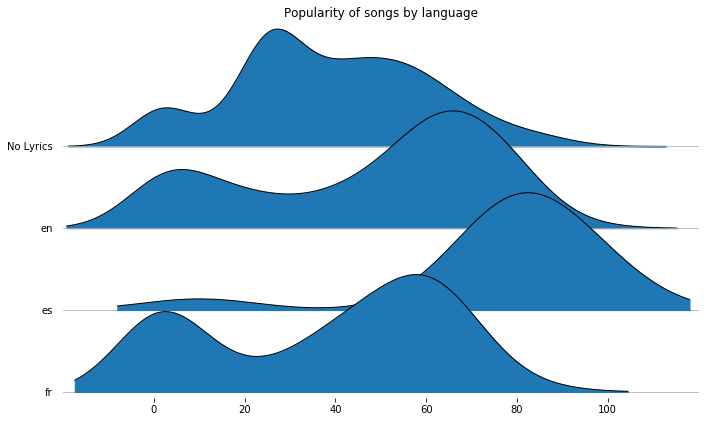

In [90]:
df_joyplot = df_songs.fillna("No Lyrics")
df_joyplot = df_joyplot[df_joyplot["lang_lyrics"].isin(["No Lyrics","fr","en","es"])]
fig, axes = joypy.joyplot(df_joyplot, by="lang_lyrics", column="popularity", range_style='own',grid="y", ylim='own', linewidth=1, legend=False,figsize=(10,6),title="Popularity of songs by language")
plt.savefig("JoyPlot Popularity Songs", bbox_inches = "tight")

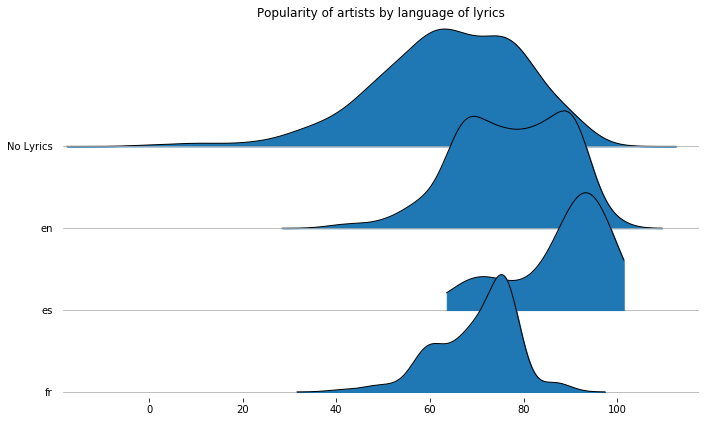

In [91]:
fig, axes = joypy.joyplot(df_joyplot, by="lang_lyrics", column="artist_popularity", range_style='own',grid="y", ylim='own', linewidth=1, legend=False,figsize=(10,6),title="Popularity of artists by language of lyrics")
plt.savefig("JoyPlot Popularity Artists", bbox_inches = "tight")

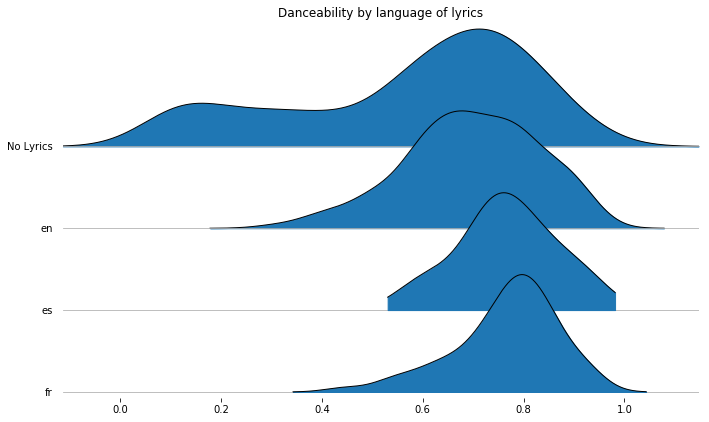

In [92]:
fig, axes = joypy.joyplot(df_joyplot, by="lang_lyrics", column="danceability", range_style='own',grid="y", ylim='own', linewidth=1, legend=False,figsize=(10,6),title="Danceability by language of lyrics")
plt.savefig("JoyPlot Danceability", bbox_inches = "tight")

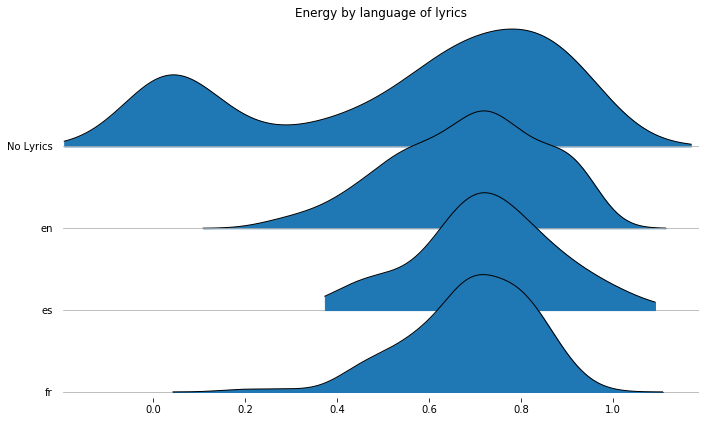

In [94]:
fig, axes = joypy.joyplot(df_joyplot, by="lang_lyrics", column="energy", range_style='own',grid="y", ylim='own', linewidth=1, legend=False,figsize=(10,6),title="Energy by language of lyrics")
plt.savefig("JoyPlot Energy", bbox_inches = "tight")

release_year
1960s      1
1970s      2
1980s      1
1990s     12
2000s     31
2010s    802
Name: song_id, dtype: int64


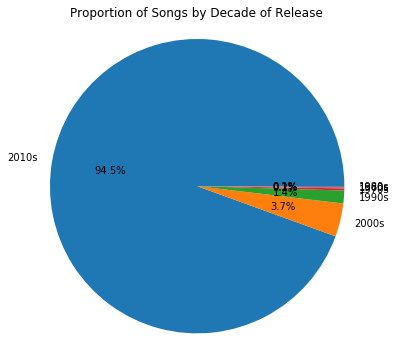

In [95]:
df_songs["release_year"] = df_songs["release_date"].apply(lambda x: str(x[0:3]) +"0s")
print(df_songs.groupby("release_year").count()["song_id"])
pie_year = df_songs.groupby("release_year").count().sort_values(by=["song_id"],ascending= False)["song_id"]/ df_songs.groupby("release_year").count().sum()["song_id"]
plt.figure(figsize=(6,6))
plt.pie(pie_year,autopct ="%1.1f%%",labels=pie_year.index)
plt.title("Proportion of Songs by Decade of Release")
plt.axis("image")
plt.savefig("Proportion of songs by decade", bbox_inches = "tight")
plt.show()

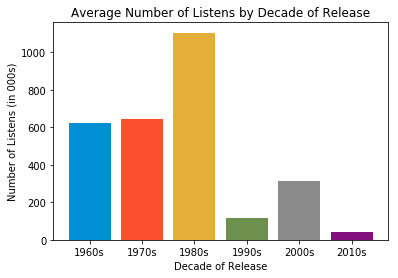

         song_name song_artist
726  Back In Black       AC/DC


In [96]:
bars_year = df_songs.groupby("release_year").mean()["lastfm_count"]/1000
plt.bar(bars_year.index,bars_year,color=['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c'])
plt.title("Average Number of Listens by Decade of Release")
plt.ylabel("Number of Listens (in 000s)")
plt.xlabel("Decade of Release")
plt.savefig("Listens by Decade", bbox_inches = "tight")
plt.show()

# Highlighting the outlier
print(df_songs[df_songs["release_year"] == "1980s"][["song_name","song_artist"]])

lang_lyrics
en    298
fr    135
es     14
it      3
de      2
nl      2
tl      2
ca      1
pt      1
sv      1
Name: song_id, dtype: int64
lang_lyrics
en    0.649237
fr    0.294118
es    0.030501
it    0.006536
de    0.004357
nl    0.004357
tl    0.004357
ca    0.002179
pt    0.002179
sv    0.002179
Name: song_id, dtype: float64


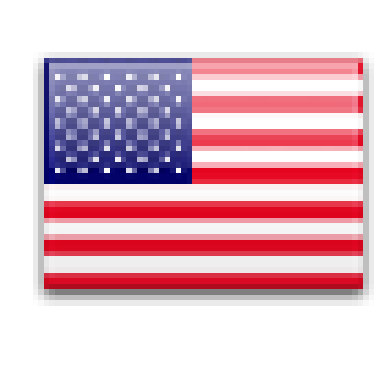

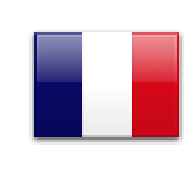

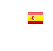

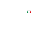

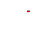

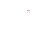

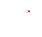

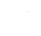

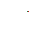

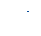

In [97]:
import matplotlib.image as mpimg

print(df_songs.groupby("lang_lyrics").count().sort_values(by=["song_id"],ascending= False)["song_id"])
print(df_songs.groupby("lang_lyrics").count().sort_values(by=["song_id"],ascending= False)["song_id"]/ df_songs.groupby("lang_lyrics").count().sum()["song_id"])

for lang in df_songs.groupby("lang_lyrics").count().sort_values(by=["song_id"],ascending= False).index:
    if lang == "en":
        ratio =  df_songs.groupby("lang_lyrics").count().loc[lang,"song_id"] / df_songs.groupby("lang_lyrics").count().sum()["song_id"]
        image = mpimg.imread("flags/64x64/us.png")
        plt.figure(figsize=(10*ratio,10*ratio))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        ratio =  df_songs.groupby("lang_lyrics").count().loc[lang,"song_id"] / df_songs.groupby("lang_lyrics").count().sum()["song_id"]
        image = mpimg.imread("flags/64x64/"+lang+".png")
        plt.figure(figsize=(10*ratio,10*ratio))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

In [98]:
df_english = df_songs[df_songs["lang_lyrics"] == "en"]

In [114]:
import nltk
from nltk.corpus import stopwords

corpus = []

for song in df_english.index:
    lyrics = df_english.loc[song,"lyrics_cleaned"]
    words = nltk.word_tokenize(lyrics)
    corpus.extend(words)

stop_words = set(stopwords.words("english"))
stop_words.update(["im","dont"])
without_stop_words = [word for word in corpus if not word in stop_words]

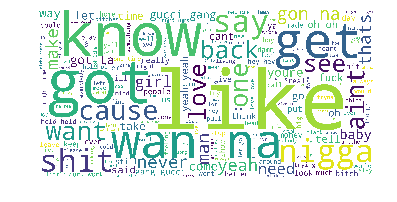

In [116]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

corpus_str = " ".join(corpus)
wordcloud = WordCloud(stopwords=stop_words,background_color='white',width=12000,height=6000).generate(corpus_str)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

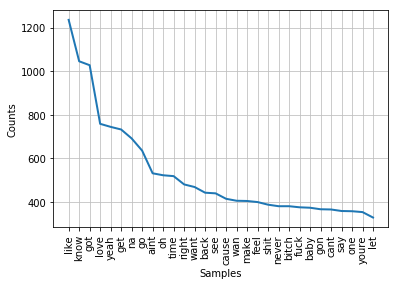

In [117]:
freq_words = nltk.FreqDist(without_stop_words)
freq_words.plot(30)

In [101]:
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [102]:
emotion_dict = get_nrc_data()
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [103]:
print("%-12s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
        "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
        "sadness","surprise"))
        
for song in df_english.index:
    text = df_english.loc[song,"lyrics_cleaned"]
    result = emotion_analyzer(text)
    print("%-12s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
        df_english.loc[song,"song_name"],result['fear'],result['trust'],
          result['negative'],result['positive'],result['joy'],result['disgust'],
          result['anticipation'],result['sadness'],result['surprise']))


restaurant   fear	trust negative positive joy   disgust anticip sadness surprise
Love Lockdown 0.04	0.04	0.05	0.10	0.09	0.04	0.02	0.04	0.03
I Love It (& Lil Pump) 0.01	0.01	0.04	0.06	0.05	0.02	0.01	0.01	0.00
Can't Tell Me Nothing 0.02	0.03	0.04	0.03	0.02	0.00	0.03	0.01	0.02
Stronger     0.04	0.03	0.04	0.04	0.03	0.01	0.04	0.02	0.02
On Sight     0.03	0.03	0.03	0.03	0.02	0.01	0.03	0.03	0.00
Black Skinhead 0.03	0.01	0.08	0.03	0.01	0.03	0.02	0.04	0.00
I Am A God   0.06	0.05	0.04	0.07	0.06	0.03	0.06	0.01	0.00
New Slaves   0.01	0.01	0.04	0.02	0.01	0.01	0.00	0.01	0.00
Hold My Liquor 0.03	0.00	0.05	0.02	0.02	0.02	0.00	0.04	0.00
I'm In It    0.01	0.02	0.03	0.04	0.02	0.01	0.03	0.01	0.02
Blood On The Leaves 0.03	0.01	0.06	0.03	0.02	0.02	0.03	0.04	0.01
Guilt Trip   0.00	0.00	0.02	0.02	0.01	0.00	0.01	0.00	0.00
Send It Up   0.06	0.01	0.08	0.02	0.01	0.05	0.01	0.06	0.01
Bound 2      0.02	0.03	0.10	0.08	0.06	0.02	0.02	0.04	0.01
Overnight    0.00	0.00	0.01	0.01	0.00	0.00	0.01	0.01	0.00
Tieduprightnow 0.0

Champions    0.03	0.03	0.05	0.04	0.02	0.02	0.03	0.03	0.01
Think        0.04	0.01	0.03	0.02	0.01	0.01	0.04	0.02	0.01
The Mack     0.03	0.03	0.03	0.05	0.03	0.01	0.03	0.02	0.01
Someone Who Needs Me 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Thinking About You 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
You Want Me  0.03	0.01	0.05	0.04	0.02	0.02	0.03	0.02	0.01
Black Beatles 0.05	0.04	0.07	0.07	0.03	0.02	0.03	0.05	0.03
Sneakin’     0.02	0.02	0.04	0.04	0.02	0.01	0.02	0.01	0.01
Fake Love    0.00	0.02	0.03	0.03	0.03	0.00	0.03	0.00	0.00
Cutting Shapes 0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Make You Feel Good 0.03	0.08	0.03	0.12	0.11	0.03	0.11	0.00	0.06
Broccoli     0.02	0.01	0.06	0.03	0.02	0.03	0.01	0.01	0.01
OOOUUU       0.02	0.01	0.10	0.03	0.01	0.07	0.01	0.02	0.01
Caroline     0.07	0.02	0.07	0.05	0.04	0.07	0.02	0.05	0.01
Sexual       0.02	0.02	0.02	0.03	0.03	0.02	0.03	0.02	0.02
Closer       0.02	0.00	0.07	0.01	0.00	0.02	0.01	0.02	0.02
Broccoli     0.02	0.01	0.06	0.03	0.02	0.03	0.01	0

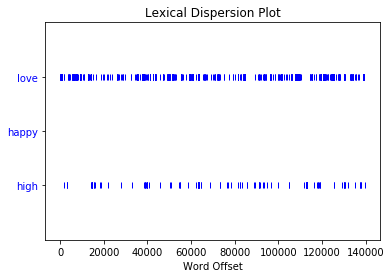

In [104]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
text = nltk.Text([p_stemmer.stem(i).lower() for i in corpus])
text.dispersion_plot(["love","happy","high"])

In [105]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize,word_tokenize 
def vader_comparison():
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for song in df_english.index:
        name = df_english.loc[song,"song_name"]
        sentences = sent_tokenize(df_english.loc[song,"lyrics_cleaned"])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s\t'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [106]:
vader_comparison()

Name	   pos	 neg	 neu	 compound
Love Lockdown	 0.25	 0.22	 0.54	 0.99	
I Love It (& Lil Pump)	 0.25	 0.10	 0.65	 1.00	
Can't Tell Me Nothing	 0.06	 0.12	 0.82	 -0.98	
Stronger  	 0.14	 0.14	 0.71	 -0.23	
On Sight  	 0.04	 0.14	 0.83	 -0.97	
Black Skinhead	 0.06	 0.27	 0.68	 -1.00	
I Am A God	 0.14	 0.15	 0.72	 -0.86	
New Slaves	 0.06	 0.27	 0.67	 -1.00	
Hold My Liquor	 0.10	 0.15	 0.75	 -0.99	
I'm In It 	 0.11	 0.15	 0.74	 -0.97	
Blood On The Leaves	 0.05	 0.09	 0.86	 -0.98	
Guilt Trip	 0.09	 0.02	 0.89	 0.97	
Send It Up	 0.08	 0.22	 0.70	 -1.00	
Bound 2   	 0.17	 0.22	 0.61	 -0.98	
Overnight 	 0.14	 0.03	 0.83	 0.94	
Tieduprightnow	 0.01	 0.01	 0.98	 0.05	
To My Love	 0.11	 0.14	 0.75	 -0.29	
Hometown Girl	 0.01	 0.20	 0.80	 -0.99	
New Lands 	 0.26	 0.00	 0.74	 1.00	
IDWK      	 0.24	 0.08	 0.68	 1.00	
Pass Out  	 0.07	 0.07	 0.86	 -0.72	
Champion  	 0.15	 0.16	 0.69	 -0.23	
!I'll Be Back!	 0.14	 0.24	 0.62	 -1.00	
Like I Love You	 0.39	 0.06	 0.55	 1.00	
The Less I Know The Better	 0

24K Magic 	 0.09	 0.09	 0.82	 -0.44	
LUV       	 0.25	 0.10	 0.65	 1.00	
Don't Wanna Know	 0.13	 0.09	 0.78	 0.93	
In the Name of Love	 0.35	 0.08	 0.57	 1.00	
Trouble   	 0.14	 0.23	 0.64	 -0.98	
Do It Right	 0.01	 0.04	 0.94	 -0.93	
Let Me Love You	 0.28	 0.08	 0.64	 1.00	
If It Ain't Love	 0.29	 0.01	 0.70	 1.00	
Taste The Feeling (Avicii Vs. Conrad Sewell)	 0.12	 0.10	 0.78	 0.84	
Figure it Out	 0.09	 0.21	 0.70	 -0.99	
This Is What You Came For	 0.05	 0.08	 0.87	 -0.82	
Sex       	 0.12	 0.12	 0.76	 -0.70	
No Money  	 0.04	 0.05	 0.91	 -0.30	
Work from Home	 0.06	 0.04	 0.90	 0.61	
Us        	 0.05	 0.14	 0.81	 -0.88	
Hercules  	 0.09	 0.24	 0.67	 -1.00	
Panda     	 0.05	 0.12	 0.82	 -0.99	
Low Life  	 0.09	 0.19	 0.72	 -1.00	
untitled 03 | 05.28.2013.	 0.23	 0.05	 0.71	 1.00	
The Right Song	 0.10	 0.05	 0.86	 0.81	
Get Ugly  	 0.25	 0.18	 0.57	 0.99	
Hard For  	 0.13	 0.21	 0.66	 -0.97	
Get Lost  	 0.07	 0.14	 0.79	 -0.98	
I'm In Control	 0.21	 0.04	 0.75	 1.00	
Dessert - Remix	 

In [107]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [108]:
texts = []

for song in df_english.index:
    lyrics = df_english.loc[song,"lyrics_cleaned"]
    words = nltk.word_tokenize(lyrics)
    texts.append(words)
    
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#Set parameters
num_topics = 5 #The number of topics that should be generated
passes = 10 

lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=10)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=3))



[   (0, '0.040*"i" + 0.029*"you" + 0.027*"the"'),
    (1, '0.040*"gucci" + 0.036*"gang" + 0.019*"a"'),
    (2, '0.045*"i" + 0.041*"the" + 0.022*"you"'),
    (3, '0.031*"the" + 0.027*"up" + 0.023*"you"'),
    (4, '0.052*"you" + 0.031*"the" + 0.030*"i"')]


In [109]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
Kanye West
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus_lda])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])


NameError: name 'corpus_lda' is not defined

In [ ]:
sims[0][0]

In [ ]:
df_english.iloc[175,1]